In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Airlines+Data.xlsx to Airlines+Data.xlsx


In [3]:
data = pd.read_excel("Airlines+Data.xlsx")

In [4]:
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


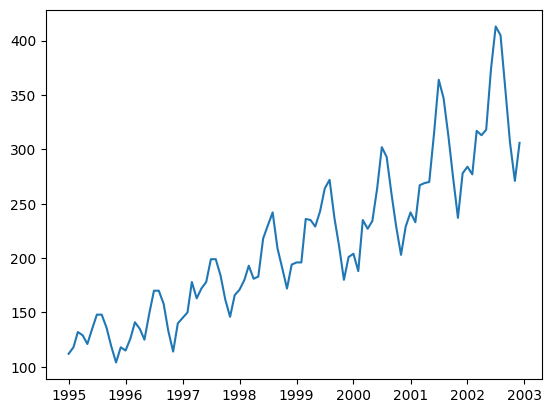

In [5]:
plt.plot(data["Month"],data["Passengers"])
#visualization of raw data

In [6]:
data.shape

(96, 2)

In [7]:
data.describe()
#descriptive statistics of data set

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [8]:
df= data.set_index('Month')
df.head()
#set the time period as a index

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [9]:
df.info()
#provides information such as the number of non-null entries, data types, and memory usage. concise summary of data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [10]:
df.isna().sum()
# checking the nul values

Passengers    0
dtype: int64

<Axes: ylabel='Density'>

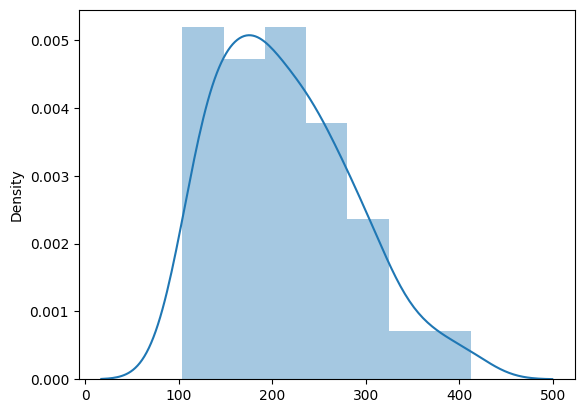

In [11]:
sns.distplot(df)
# distribution of the data

DECOMPOSITION


In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
r1_add= seasonal_decompose(df,model="additive")
# Classical Decomposition (Trend, Seasonal, Residual) :model = (additive and multiplicative)two types is there

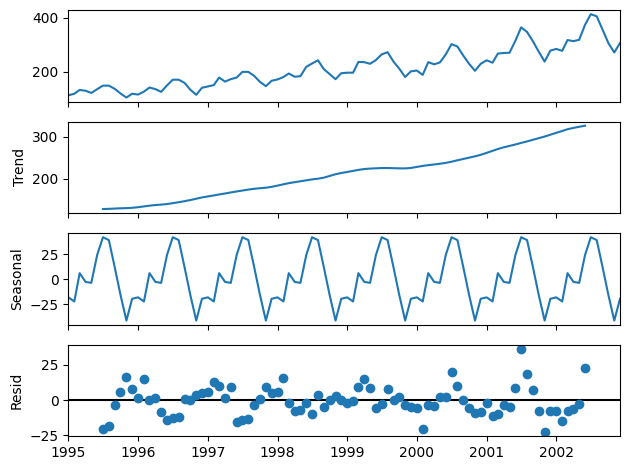

In [14]:
add_plot = r1_add.plot()

In [15]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

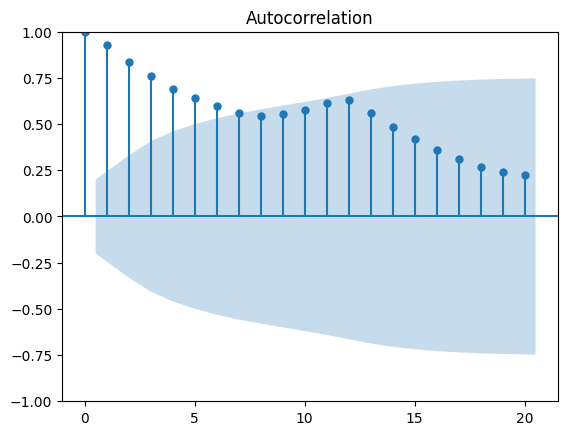

In [71]:
 acf = plot_acf(df)

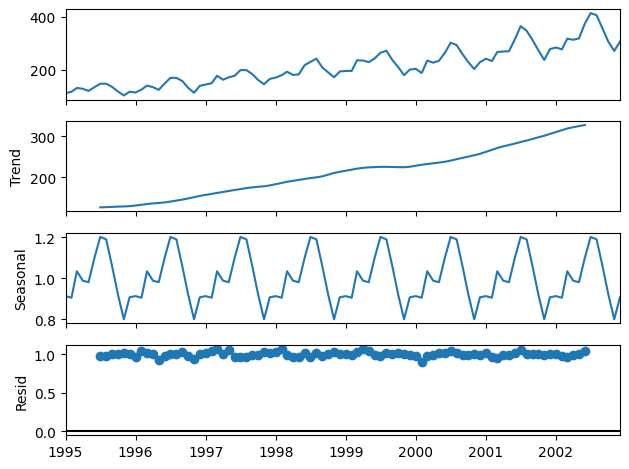

In [17]:
r1_mul = seasonal_decompose(df,model="multiplicative")
mul_plot = r1_mul.plot()

Stationary Check

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
test = adfuller(df)
#Augmented Dickey-Fuller- statistical hypothesis test for checking stationary

In [20]:
print(test)
print('ADF Statistic:', test[0])
print('p-value:', test[1])

(1.3402479596467138, 0.9968250481137263, 12, 83, {'1%': -3.5117123057187376, '5%': -2.8970475206326833, '10%': -2.5857126912469153}, 626.0084713813505)
ADF Statistic: 1.3402479596467138
p-value: 0.9968250481137263


In [21]:
if test[1]<0.05:
  print(" Reject the Null Hypothisis --> the data set is stationary")
else:
  print(" Accept the Null Hypothisis --> the data set is Not stationary")

 Accept the Null Hypothisis --> the data set is Not stationary


Model Building for Forcasting

In [22]:
train = df.head(70)
test = df.tail(26)

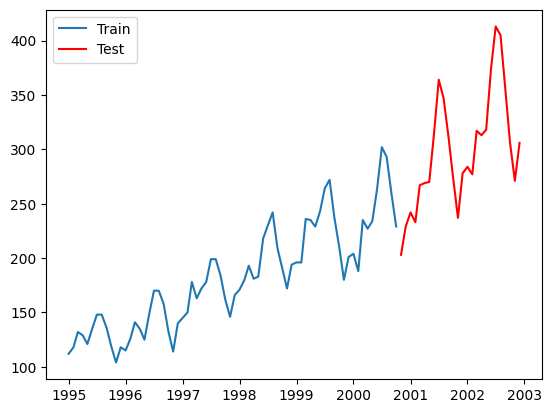

In [24]:
plt.plot(train,label="Train")
plt.plot(test,color="r",label="Test")
plt.legend()

In [25]:
test.head()

,Passengers
Month,
2000-11-01,203
2000-12-01,229
2001-01-01,242
2001-02-01,233
2001-03-01,267


In [26]:
train.tail()

,Passengers
Month,
2000-06-01,264
2000-07-01,302
2000-08-01,293
2000-09-01,259
2000-10-01,229


Methods of Forcasting

In [27]:
#Simple Moving average- its smoothing technique to find outh the patterns ,seasonality from changing the window size
#Exponential Smoothing
#Auto regressive(AR)
#ARIMA

In [28]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

Holts winter exponential smoothing with additive seasonality and additive trend

In [29]:
hw_model = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()
# create the holt winter model and fit the model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [30]:
pred_hw = hw_model.predict(start=test.index[0],end=test.index[-1])
# prdict the futere data / forcasting

In [31]:
pred_hw[0:5]
# forcasted values

2000-11-01    211.016132
2000-12-01    231.616491
2001-01-01    233.966533
2001-02-01    236.466165
2001-03-01    262.632954
Freq: MS, dtype: float64

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
rmse_hwa = mean_squared_error(test["Passengers"],pred_hw,squared=False).round(2)
rmse_hwa

42.76

Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [34]:
hw_m = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
pred_m = hw_m.predict(start=test.index[0],end=test.index[-1])

In [36]:
rmse_hwm = mean_squared_error(test["Passengers"],pred_m,squared=False).round(2)
rmse_hwm

34.85

ARIMA Model

In [37]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [38]:
model = ARIMA(train["Passengers"], order=(1,1,1)).fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [39]:
pred = model.predict(start=test.index[0],end=test.index[-1])

In [40]:
pred[0:4]

2000-11-01    223.449478
2000-12-01    227.659438
2001-01-01    224.466267
2001-02-01    226.888224
Freq: MS, Name: predicted_mean, dtype: float64

In [41]:
rmse_arima =mean_squared_error(test["Passengers"],pred,squared=False).round(2)
rmse_arima

90.22

Holt's Model (Double Exponential Smoothing)

In [43]:
from statsmodels.tsa.holtwinters import Holt

In [45]:
model_h = Holt(train["Passengers"]).fit(smoothing_level=0.8,smoothing_slope=0.2)
#smoothing level is alpha value know as weight-high values indicates most importance to the past data
#smoothing slope is weight of trend equation(0-1) low value indicates most importance in past trend

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [46]:
pred_h = model_h.predict(start=test.index[0],end=test.index[-1])

In [47]:
pred_h[0:4]

2000-11-01    234.072094
2000-12-01    230.548404
2001-01-01    227.024714
2001-02-01    223.501024
Freq: MS, dtype: float64

In [49]:
rmse_h = mean_squared_error(test["Passengers"],pred_h,squared=False)
rmse_h

130.56650740782132

In [57]:
models =["Holt's Smoothing","Holt's Winter_Additive","Holt's Winter_Multiplicative","ARIMA"]
rmse = [rmse_h,rmse_hwa,rmse_hwm,rmse_arima]

d = {"Model_Name":models,"RMSE":rmse}
d1=pd.DataFrame(d)
d1.sort_values(ascending=True,by="RMSE")

,Model_Name,RMSE
2,Holt's Winter_Multiplicative,34.850000
1,Holt's Winter_Additive,42.760000
3,ARIMA,90.220000
0,Holt's Smoothing,130.566507


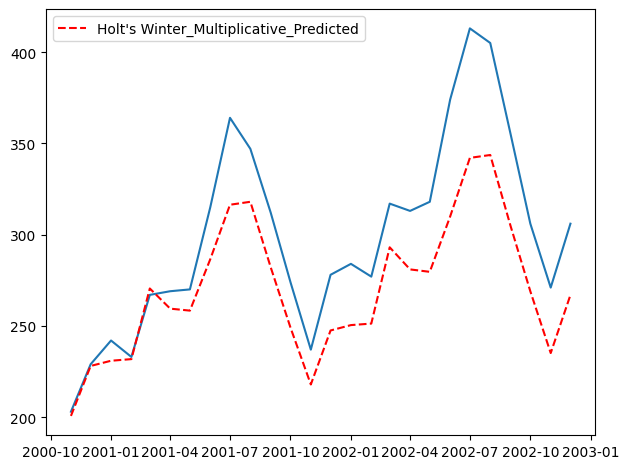

In [68]:

plt.plot(test)
plt.plot(pred_m, color="r", linestyle="--", label="Holt's Winter_Multiplicative_Predicted")
plt.legend()
plt.tight_layout()

In [69]:
#So Holt's exponential smoothing with multiplicative seasonality and additive trend is the best model as it has the lowest rmse.